In [320]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

# Load dataset
data = pd.read_csv('./data/Electronic_sales_Sep2023-Sep2024.csv')

# Set plot style
sns.set_style('whitegrid')


In [238]:
data


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [239]:
# Drop rows with missing values in critical columns
data = data.dropna(subset=['Rating', 'Total Price', 'Purchase Date'])

# Convert 'Purchase Date' to datetime and handle errors
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], errors='coerce')
data = data.dropna(subset=['Purchase Date'])  # Drop rows with missing Purchase Date

# Drop duplicate rows
data_cleaned = data.drop_duplicates()

# Standardize 'Paypal' to 'PayPal' in the 'Payment Method' column
data_cleaned['Payment Method'] = data_cleaned['Payment Method'].replace('Paypal', 'PayPal')

# Check the info of the cleaned data
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        20000 non-null  int64         
 1   Age                20000 non-null  int64         
 2   Gender             19999 non-null  object        
 3   Loyalty Member     20000 non-null  object        
 4   Product Type       20000 non-null  object        
 5   SKU                20000 non-null  object        
 6   Rating             20000 non-null  int64         
 7   Order Status       20000 non-null  object        
 8   Payment Method     20000 non-null  object        
 9   Total Price        20000 non-null  float64       
 10  Unit Price         20000 non-null  float64       
 11  Quantity           20000 non-null  int64         
 12  Purchase Date      20000 non-null  datetime64[ns]
 13  Shipping Type      20000 non-null  object        
 14  Add-on

In [491]:
# Extract Year and Month from Purchase Date
data_cleaned['Purchase Year'] = data_cleaned['Purchase Date'].dt.year
data_cleaned['Purchase Month No'] = data_cleaned['Purchase Date'].dt.month
data_cleaned['Purchase Month'] = data_cleaned['Purchase Date'].dt.strftime('%b')

# Sort based on date
data_cleaned = data_cleaned.sort_values(by=['Purchase Year', 'Purchase Month No'], ascending=False)



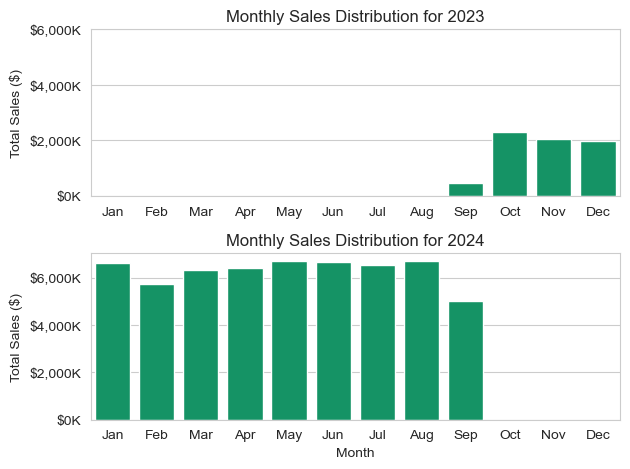

In [492]:
# Filter and group data for 2023 and 2024
monthly_sales_2023 = data_cleaned[data_cleaned['Purchase Year'] == 2023].groupby('Purchase Month No')['Total Price'].sum()
monthly_sales_2024 = data_cleaned[data_cleaned['Purchase Year'] == 2024].groupby('Purchase Month No')['Total Price'].sum()

monthly_sales_2023.index = monthly_sales_2023.index.map(lambda x: calendar.month_abbr[int(x)])  # Use month abbreviation
monthly_sales_2024.index = monthly_sales_2024.index.map(lambda x: calendar.month_abbr[int(x)])  # Use month abbreviation

# Create a figure with 2 subplots
fig, ax = plt.subplots(2, 1)

# Plot for 2023
sns.barplot(x=monthly_sales_2023.index, y=monthly_sales_2023.values, ax=ax[0], order=calendar.month_abbr[1:], color='#00A86B')
ax[0].set_title('Monthly Sales Distribution for 2023')
ax[0].set_ylim(0, 6000000)
ax[0].set_xlabel('')
ax[0].set_ylabel('Total Sales ($)')

# Plot for 2024
sns.barplot(x=monthly_sales_2024.index, y=monthly_sales_2024.values, ax=ax[1], order=calendar.month_abbr[1:], color='#00A86B')
ax[1].set_title('Monthly Sales Distribution for 2024')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Sales ($)')


# Custom formatter for y-axis to show values in 'K' format
for axis in ax:
    axis.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${int(x / 1000):,}K'))
    
plt.tight_layout()
plt.show()

In [ ]:
# Calculate average transaction total per payment method
payment_method = data_cleaned.groupby('Payment Method')['Total Price'].agg(['mean', 'count']).rename(columns={'mean': 'Avg Transaction Total', 'count': 'Transaction Count'})

payment_method

,Avg Transaction Total,Transaction Count
Payment Method,,
Bank Transfer,3766.912516,3371
Cash,2510.261569,2492
Credit Card,3223.206019,5868
Debit Card,2726.109891,2471
PayPal,3276.792685,5798


C:\Users\User\AppData\Local\Temp\ipykernel_11832\3395836126.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)
C:\Users\User\AppData\Local\Temp\ipykernel_11832\3395836126.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=payment_method_sorted.index, x=payment_method_sorted['Avg Transaction Total'], palette='Purples_r')
C:\Users\User\AppData\Local\Temp\ipykernel_11832\3395836126.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


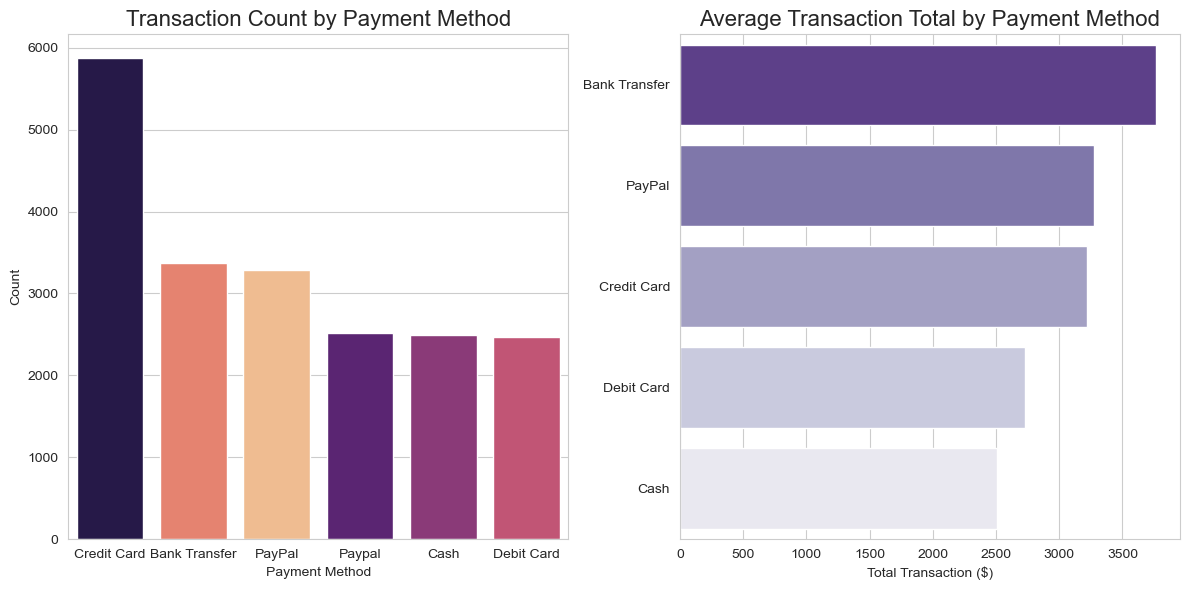

In [489]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Count the occurrences of each payment method and sort
payment_method_count = data_cleaned['Payment Method'].value_counts().index
sns.countplot(data=data_cleaned, x='Payment Method', hue='Payment Method', palette='magma', order=payment_method_count)
plt.title('Transaction Count by Payment Method', fontsize=16)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend().set_visible(False)

# Histogram for average transaction total by payment method (sorted)
plt.subplot(1, 2, 2)
# Sort payment methods by average transaction total
payment_method_sorted = payment_method.sort_values(by='Avg Transaction Total', ascending=False)
sns.barplot(y=payment_method_sorted.index, x=payment_method_sorted['Avg Transaction Total'], palette='Purples_r')
plt.title('Average Transaction Total by Payment Method', fontsize=16)
plt.xlabel('Total Transaction ($)')
plt.ylabel('')
plt.legend().set_visible(False)

plt.tight_layout()
plt.show()


In [261]:
data_cleaned['Product Type'].unique()

array(['Smartphone', 'Tablet', 'Smartwatch', 'Laptop', 'Headphones'],
      dtype=object)

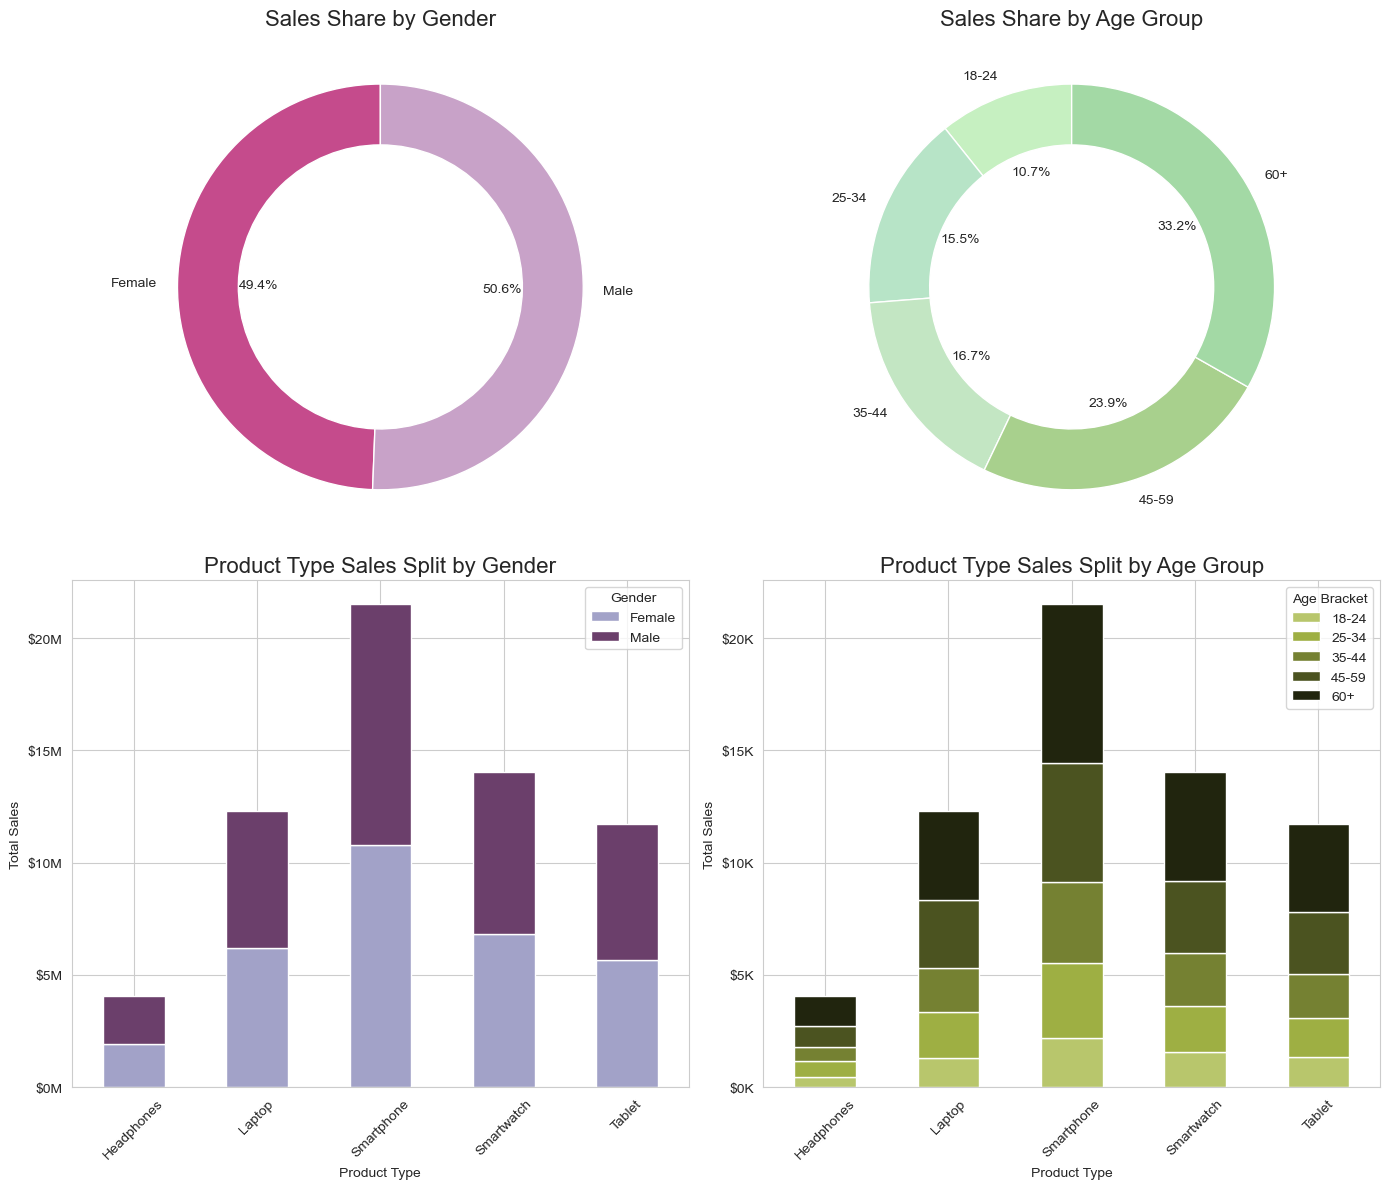

In [486]:
# Define age bins and Lbels for age distribution
age_bins = [18, 25, 35, 45, 60, 81]
age_labels=['18-24', '25-34', '35-44', '45-59', '60+']
data_cleaned['Age Bracket'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate sales contribution by gender and age bracket
gender_sales = data_cleaned.groupby('Gender', observed=True)['Total Price'].sum()
age_sales = data_cleaned.groupby('Age Bracket', observed=True)['Total Price'].sum()

# Calculate sales distribution by Product type, Gender and Age Bracket
product_gender_sales = data_cleaned.groupby(['Product Type', 'Gender'], observed=True)['Total Price'].sum().unstack()
product_age_sales = data_cleaned.groupby(['Product Type', 'Age Bracket'], observed=True)['Total Price'].sum().unstack()

# Plot donut charts for gender and age sales contribution
fig, ax = plt.subplots(2, 2, figsize=(14,12))

# Donut chart for gender contribution
ax[0, 0].pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=90, colors=['#C54B8C', '#C8A2C8'], wedgeprops=dict(width=0.3))
ax[0, 0].set_title('Sales Share by Gender', fontsize=16)

# Donut chart for age bracket contribution
ax[0, 1].pie(age_sales, labels=age_sales.index, autopct='%1.1f%%', startangle=90, colors=["#C6F0C1", "#B7E4C7", "#C3E6C3", "#A8D08D", "#A3D9A5"], wedgeprops=dict(width=0.3))
ax[0, 1].set_title('Sales Share by Age Group', fontsize=16)


# Stacked bar chart for Product Type distribution by Gender
product_gender_sales.plot(kind='bar', stacked=True, color=['#A2A2C8', '#6B3F6B'], ax=ax[1, 0])
ax[1, 0].set_title('Product Type Sales Split by Gender', fontsize=16)
ax[1, 0].set_xlabel('Product Type')
ax[1, 0].set_ylabel('Total Sales')
ax[1, 0].legend(title='Gender')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)

ax[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x * 1e-6)))

# Stacked bar chart for Product typ distribution by age Group
product_age_sales.plot(kind='bar', stacked=True, color=['#B8C66C', '#9EAF43', '#758132', '#4B5320', '#21250E'], ax=ax[1, 1])
ax[1, 1].set_title('Product Type Sales Split by Age Group', fontsize=16)
ax[1, 1].set_xlabel('Product Type')
ax[1, 1].set_ylabel('Total Sales') 
ax[1, 1].legend(title='Age Bracket')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)

ax[1, 1].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x * 1e-6)))

plt.tight_layout()
plt.show()

In [376]:
# Shift the 'Loyalty Member' column to detect changes
data['Previous Loyalty Status'] = data.groupby('Customer ID')['Loyalty Member'].shift(1)

# Define loyalty status change
data['Loyalty Status Change'] = np.where(
    (data['Loyalty Member'] == 'Yes') & (data['Previous Loyalty Status'] == 'No'), 'Joined',
    np.where((data['Loyalty Member'] == 'No') & (data['Previous Loyalty Status'] == 'Yes'), 'Cancelled', 'No Change')
)

# Check results
print("Data with Loyalty Status Change:\n", data[['Customer ID', 'Loyalty Member', 'Previous Loyalty Status', 'Loyalty Status Change']].head())


Data with Loyalty Status Change:
    Customer ID Loyalty Member Previous Loyalty Status Loyalty Status Change
0         1000             No                     NaN             No Change
1         1000             No                      No             No Change
2         1002             No                     NaN             No Change
3         1002            Yes                      No                Joined
4         1003            Yes                     NaN             No Change


C:\Users\User\AppData\Local\Temp\ipykernel_11832\2789171730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Loyalty Status Change', data=data_cleaned, palette='Greens_r')


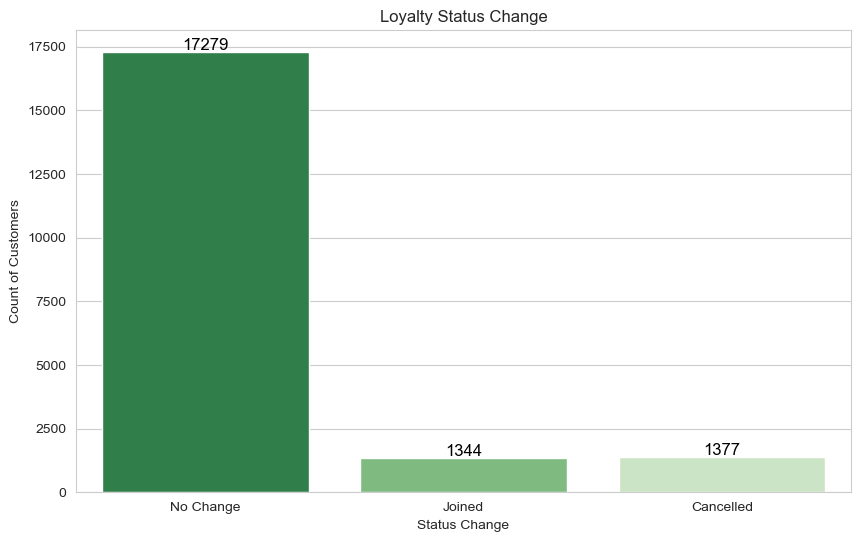

In [482]:
plt.figure(figsize=(10,6))

ax = sns.countplot(x='Loyalty Status Change', data=data_cleaned, palette='Greens_r')
# Add the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Loyalty Status Change')
plt.xlabel('Status Change')
plt.ylabel('Count of Customers')
plt.show()

In [444]:
data_cleaned

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Previous Loyalty Status,Loyalty Status Change,Days Since First Purchase,Avg Purchase Frequency
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,NaN,No Change,0,0.064516
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,No,No Change,31,0.064516
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,NaN,No Change,0,0.006734
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,No,Joined,297,0.006734
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,NaN,No Change,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00,No,No Change,143,0.027907
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00,No,Joined,176,0.027907
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,Yes,Cancelled,215,0.027907
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,NaN,No Change,0,inf


In [456]:
# Calculate total spend per customer
customer_total_spend = data_cleaned.groupby('Customer ID')['Total Price'].sum()

# Segment customers based on their total spend
spend_bins = [0, 50, 100, 500, 1000, 5000, 10000, float('inf')]  # Corrected order of bins
spend_labels =  ['0-50', '51-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10000+']
data_cleaned['Spend Category'] = pd.cut(customer_total_spend, bins=spend_bins, labels=spend_labels, right=False)

# Calculate number of customers in each spend category
spend_category_counts = data_cleaned['Spend Category'].value_counts()



C:\Users\User\AppData\Local\Temp\ipykernel_11832\398765935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spend_category_counts.index, y=spend_category_counts.values, palette='PiYG')


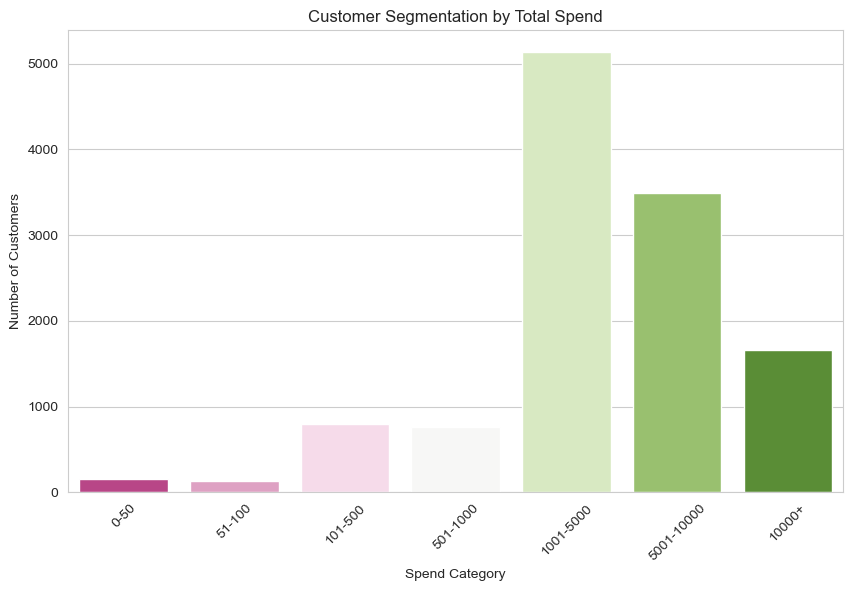

In [479]:
plt.figure(figsize=(10, 6))
sns.barplot(x=spend_category_counts.index, y=spend_category_counts.values, palette='PiYG')
plt.title('Customer Segmentation by Total Spend')
plt.xlabel('Spend Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate total spend for each customer
customer_spend = data_cleaned.groupby('Customer ID')['Total Price'].sum().reset_index()

In [508]:
# Ensure 'Customer ID' is treated as a categorical type in the sorted order
top_10_customers['Customer ID'] = pd.Categorical(
    top_10_customers['Customer ID'],
    categories=top_10_customers['Customer ID'],
    ordered=True
)

C:\Users\User\AppData\Local\Temp\ipykernel_11832\1892241008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


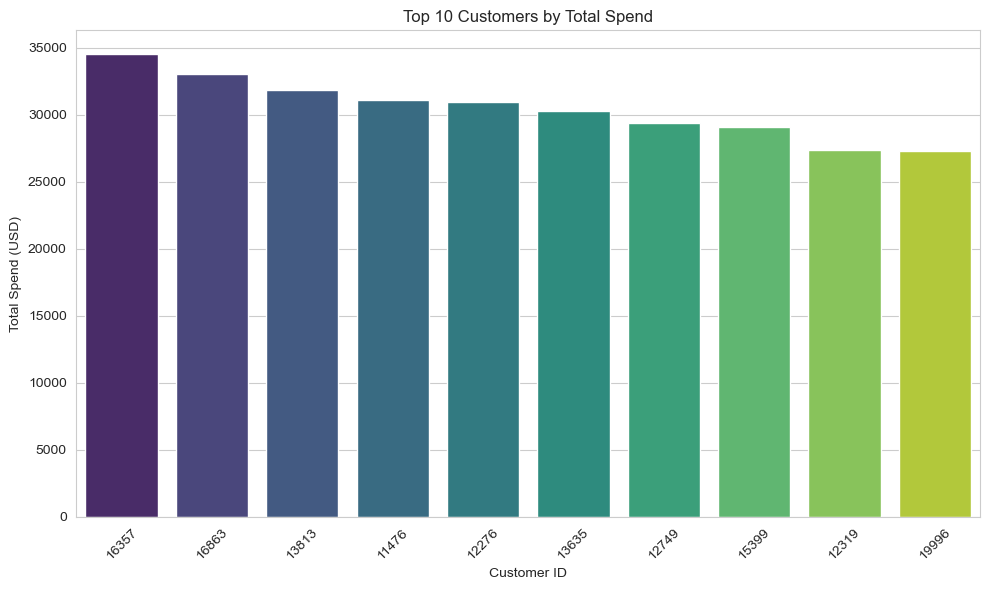

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Customer ID',
    y='Total Price',
    data=top_10_customers,
    palette='viridis'
)
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()